In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# %matplotlib inline
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv('articles.csv')

In [ ]:
df

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [ ]:
df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
df.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
df.shape

(105542, 25)

In [ ]:
df.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Print all Categorical Columns

In [ ]:
# Categorical Column
print('Categorical Columns\n')
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
cat_cols

Categorical Columns



['prod_name',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_name',
 'colour_group_name',
 'perceived_colour_value_name',
 'perceived_colour_master_name',
 'department_name',
 'index_code',
 'index_name',
 'index_group_name',
 'section_name',
 'garment_group_name',
 'detail_desc']

Print all Numerical Columns

In [ ]:
# Numerical Columns
print('Numerical Columns\n')
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = [col for col in df.columns if df[col].dtype in numeric]
num_cols

Numerical Columns



['article_id',
 'product_code',
 'product_type_no',
 'graphical_appearance_no',
 'colour_group_code',
 'perceived_colour_value_id',
 'perceived_colour_master_id',
 'department_no',
 'index_group_no',
 'section_no',
 'garment_group_no']

Although above is list of numeical columns
but except article_id can not consider other columns as numerical
they all are categorical but categories are in numerical format   

In [ ]:
# article_id 
# product_code 
# prod_name 
# product_type_no
# product_type_name
# product_group_name
# graphical_appearance_name
# colour_group_name
# perceived_colour_value_name
# perceived_colour_master_name
# department_name
# index_name
# index_group_name
# garment_group_name

Count Unique values in each column

In [ ]:
df.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [ ]:
# unique values in numerical columns
df.loc[:,num_cols].nunique()

article_id                    105542
product_code                   47224
product_type_no                  132
graphical_appearance_no           30
colour_group_code                 50
perceived_colour_value_id          8
perceived_colour_master_id        20
department_no                    299
index_group_no                     5
section_no                        57
garment_group_no                  21
dtype: int64

Check if unique values in duplicate columns count to same

In [ ]:
print(df.index_group_no.unique()) # numerical
print(df.index_group_name.unique()) # categorical

[ 1  4  3 26  2]
['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']


In [ ]:
print(df.perceived_colour_value_id.unique()) # numerical
print(df.perceived_colour_value_name.unique()) # categorical

[ 4  3  1  2  5  7  6 -1]
['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Undefined'
 'Unknown']


In [ ]:
print(df.perceived_colour_master_id.unique())
print(df.perceived_colour_master_name.unique())

[ 5  9 11 12  2  4  6 18  1  3 15 13  7  8 20 19 14 -1 10 16]
['Black' 'White' 'Beige' 'Grey' 'Blue' 'Pink' 'Lilac Purple' 'Red' 'Mole'
 'Orange' 'Metal' 'Brown' 'Turquoise' 'Yellow' 'Khaki green' 'Green'
 'undefined' 'Unknown' 'Yellowish Green' 'Bluish Green']


In [ ]:
print(df.colour_group_code.unique())
print(df.colour_group_name.unique())

[ 9 10 11 12 13  7 71  6 73  8 52 43 15 31  3  5 51 53 17 72 81 22 19 23
 50 63 42  2 93 40 82 33  1 32 14 20 91 30 62 41 21 92 61 83 60  4 80 90
 70 -1]
['Black' 'White' 'Off White' 'Light Beige' 'Beige' 'Grey' 'Light Blue'
 'Light Grey' 'Dark Blue' 'Dark Grey' 'Pink' 'Dark Red' 'Greyish Beige'
 'Light Orange' 'Silver' 'Gold' 'Light Pink' 'Dark Pink' 'Yellowish Brown'
 'Blue' 'Light Turquoise' 'Yellow' 'Greenish Khaki' 'Dark Yellow'
 'Other Pink' 'Dark Purple' 'Red' 'Transparent' 'Dark Green' 'Other Red'
 'Turquoise' 'Dark Orange' 'Other' 'Orange' 'Dark Beige' 'Other Yellow'
 'Light Green' 'Other Orange' 'Purple' 'Light Red' 'Light Yellow' 'Green'
 'Light Purple' 'Dark Turquoise' 'Other Purple' 'Bronze/Copper'
 'Other Turquoise' 'Other Green' 'Other Blue' 'Unknown']


Remove unwanted/duplicates columns

In [ ]:
df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
# Check length of expected duplicate columns
# If same then they are duplicates else not 
len(df.garment_group_no.unique()) == len(df.garment_group_name.unique())

True

In [ ]:
############
## Remove ##
############

# graphical_appearance_name
# colour_group_name
# perceived_colour_value_name
# perceived_colour_master_name
# index_name
# index_group_name
# garment_group_name

True

In [ ]:
# Remove all duplicate columns
gg = ['graphical_appearance_no','colour_group_code','perceived_colour_value_id','perceived_colour_master_id','index_code','index_group_no','garment_group_no']
clmns = df.columns
new_clmns = [x for x in clmns if x not in gg]
new_clmns

['article_id',
 'product_code',
 'prod_name',
 'product_type_no',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_name',
 'colour_group_name',
 'perceived_colour_value_name',
 'perceived_colour_master_name',
 'department_no',
 'department_name',
 'index_name',
 'index_group_name',
 'section_no',
 'section_name',
 'garment_group_name',
 'detail_desc']

In [ ]:
print('Length of new columns: ',len(new_clmns))

Length of new columns:  18


In [ ]:
df1 = df.loc[:,new_clmns]
df1

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_no,department_name,index_name,index_group_name,section_no,section_name,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,Solid,Black,Dark,Black,1676,Jersey Basic,Ladieswear,Ladieswear,16,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,Solid,White,Light,White,1676,Jersey Basic,Ladieswear,Ladieswear,16,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,1676,Jersey Basic,Ladieswear,Ladieswear,16,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,Solid,Black,Dark,Black,1339,Clean Lingerie,Lingeries/Tights,Ladieswear,61,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,Solid,White,Light,White,1339,Clean Lingerie,Lingeries/Tights,Ladieswear,61,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,Placement print,Black,Dark,Black,7188,Socks Bin,Menswear,Menswear,26,Men Underwear,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,Solid,Black,Dark,Black,1919,Jersey,Ladieswear,Ladieswear,2,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,Solid,Black,Dark,Black,1641,Jersey,Ladieswear,Ladieswear,18,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,Solid,Black,Dark,Black,3946,Small Accessories,Divided,Divided,52,Divided Accessories,Accessories,Large plastic hair claw.


In [ ]:
df1.shape

(105542, 18)

Missing values search

In [ ]:
# sum of null values across all dataframe
df.isna().sum().sum()

416

In [ ]:
# count null values in each column
df.isna().sum()
# detail_desc is only column with null values

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [ ]:
df1.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_name           30
colour_group_name                   50
perceived_colour_value_name          8
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_name                          10
index_group_name                     5
section_no                          57
section_name                        56
garment_group_name                  21
detail_desc                      43404
dtype: int64

## Univariate analysis

In [ ]:
def univ_plot(col_name, fig_size =(25,10), rot_tixks = 80, rot_labels = 45, miss = 0, top = 'all'):
  '''
  To plot univariate visualizaitons
  Paramters- fig_size: (figure size in tuple format), column_name: column name,rot_xtixks: rotation of xticks, rot_labels: rotation of labels on the barplot
              miss: number of first entries to miss
  Return: plot the visulizatiopn usiong seaborn
  '''
  
  plt.figure(figsize=fig_size)
  plt.title('Univariate Analysis - '+str(col_name))
  plt.xlabel('Categories')
  plt.ylabel('Count')

  if top =='all':
    dict = df[col_name].value_counts()[miss:].to_dict()
  else:
    dict = df[col_name].value_counts()[miss:int(top)].to_dict()
    
  values =  [int(i) for i in dict.values()]
  ax = sns.barplot(x=list(dict.keys()),y=values)
  plt.xticks(rotation= rot_tixks)

  # To add labels above each bar
  for p, label in zip(ax.patches, values):
      ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5),rotation = rot_labels)

garment_group_name

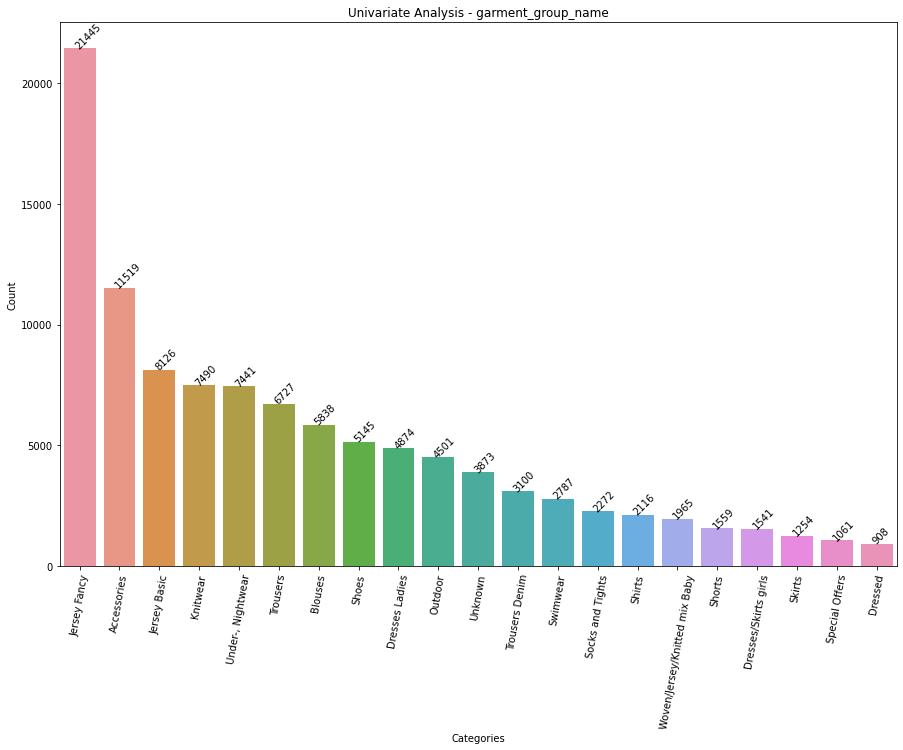

In [ ]:
univ_plot(col_name='garment_group_name',fig_size=(15,10))

section_name

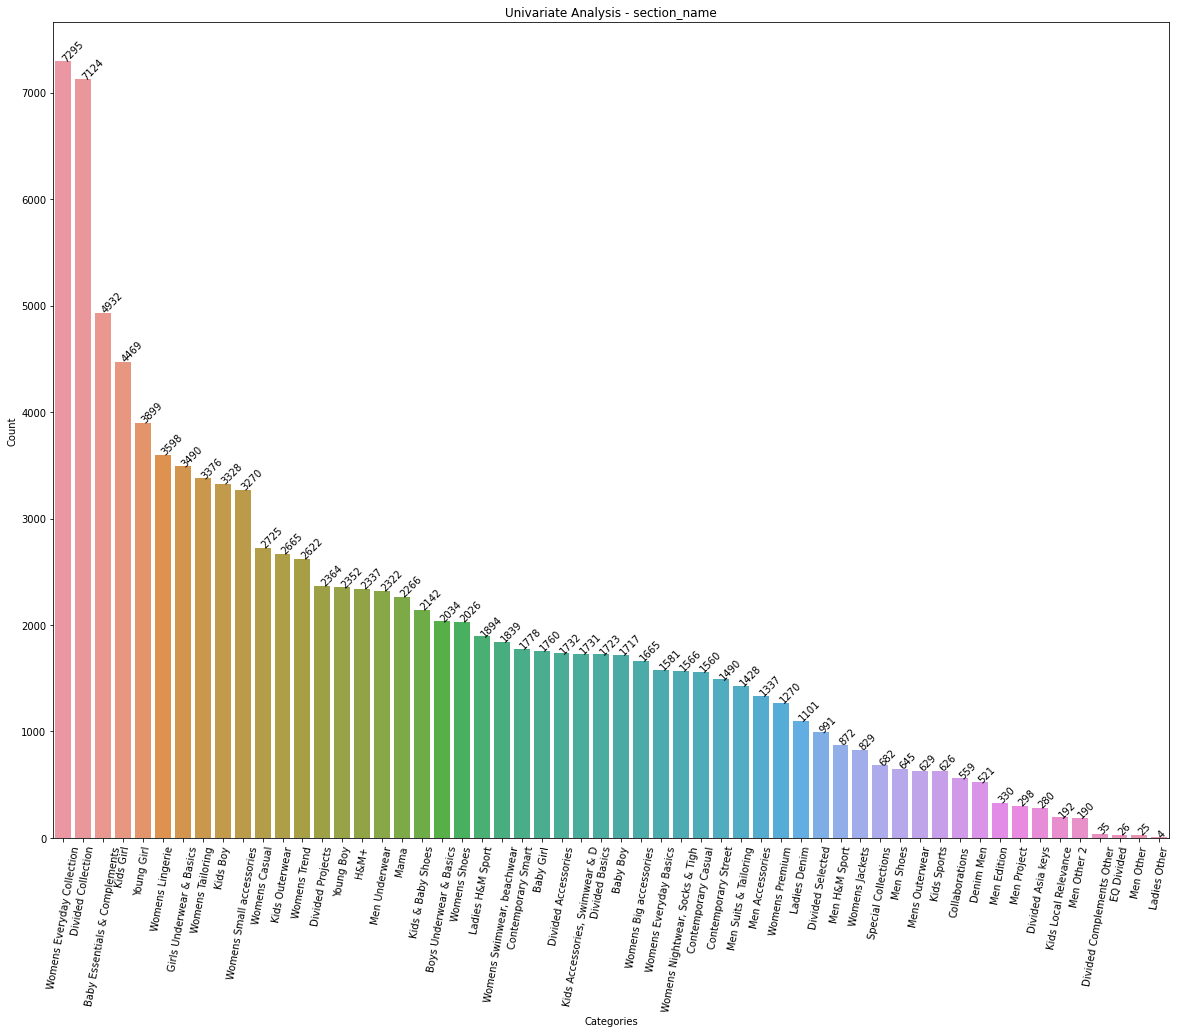

In [ ]:
univ_plot(col_name='section_name',fig_size=(20,15))

index_group_name

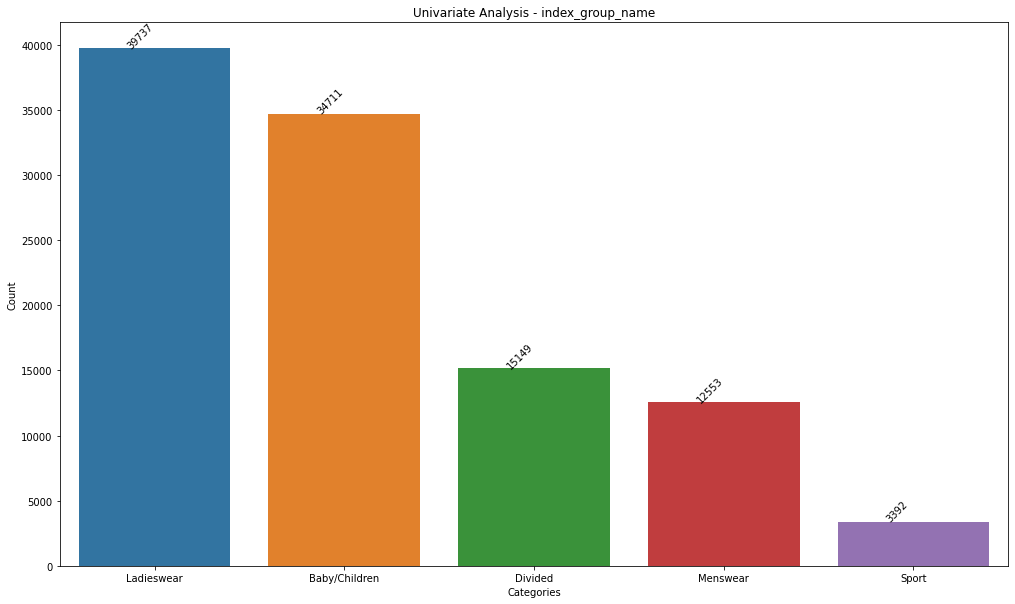

In [ ]:
univ_plot(col_name='index_group_name',fig_size=(17,10),rot_tixks=0)

index_name

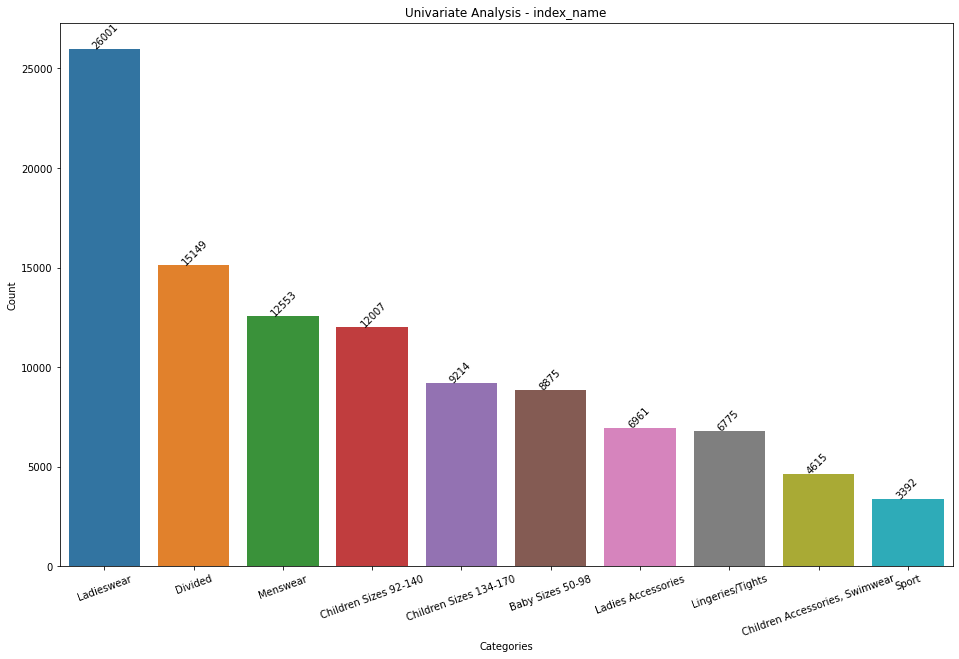

In [ ]:
univ_plot(col_name='index_name',fig_size=(16,10), rot_tixks=20, top = 5)

department_name

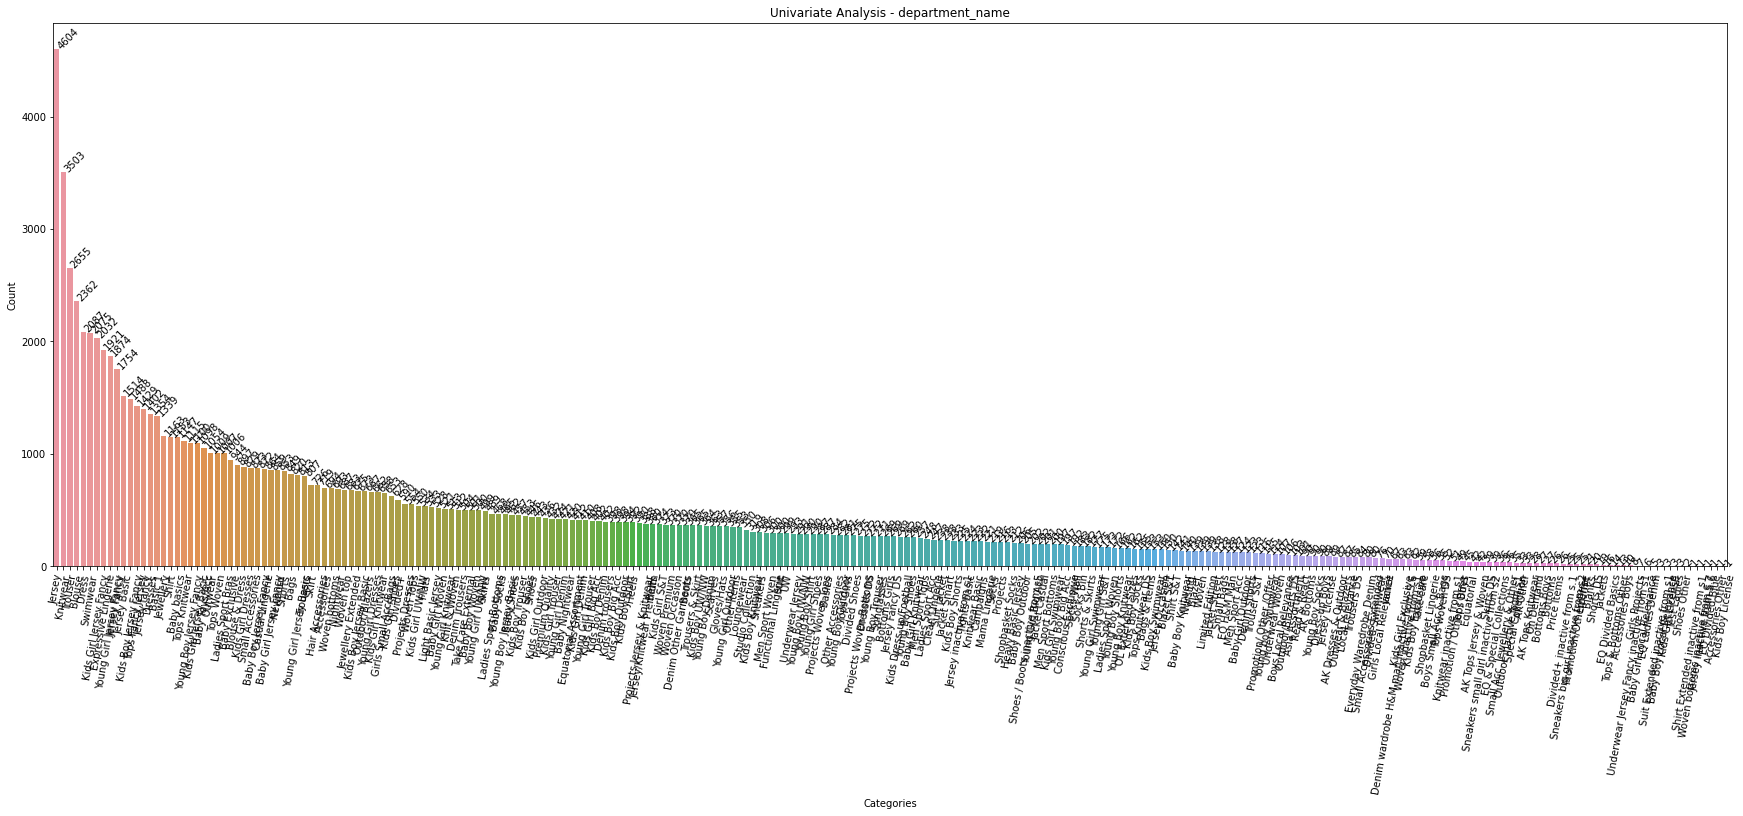

In [ ]:
univ_plot(col_name='department_name',fig_size=(30,10))

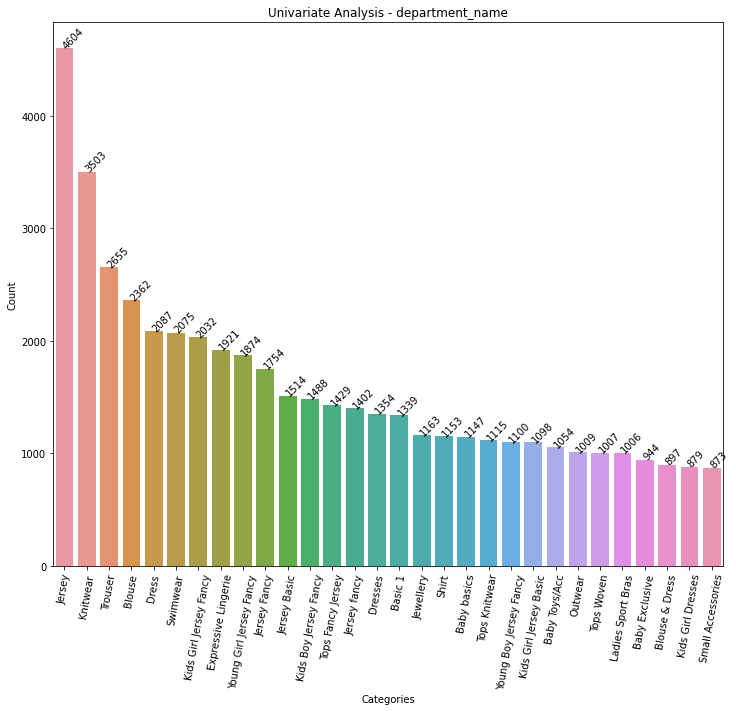

In [ ]:
univ_plot(col_name='department_name',fig_size=(12,10),top = 30)

perceived_colour_master_name

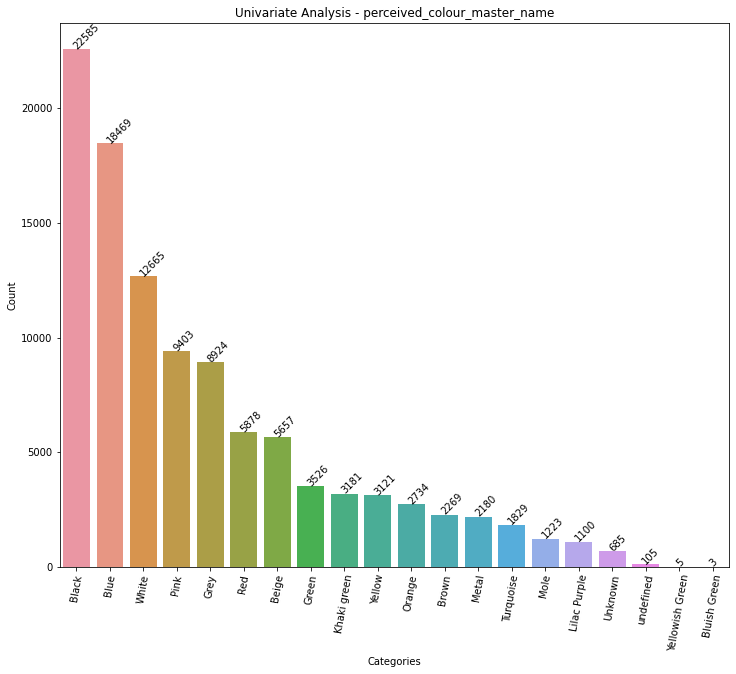

In [ ]:
univ_plot(col_name='perceived_colour_master_name',fig_size=(12,10),top = 30)

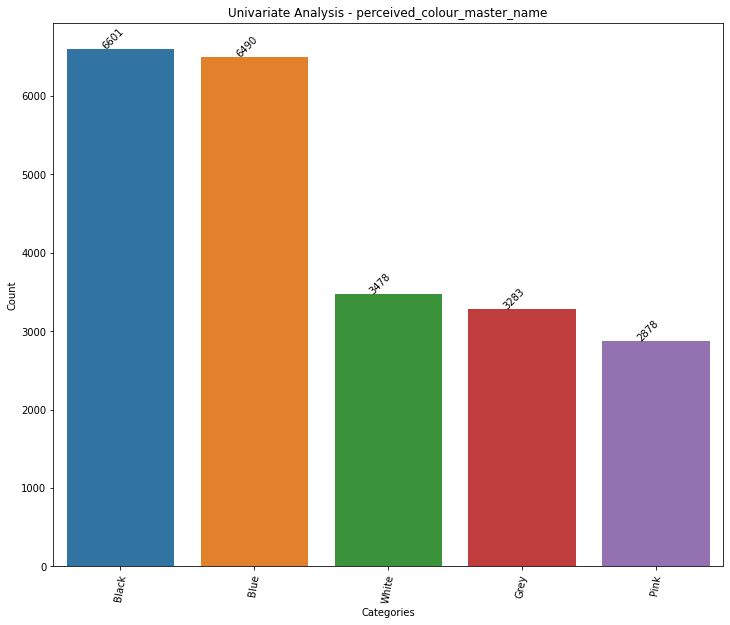

In [ ]:
univ_plot(col_name='perceived_colour_master_name',fig_size=(12,10),top = 5)

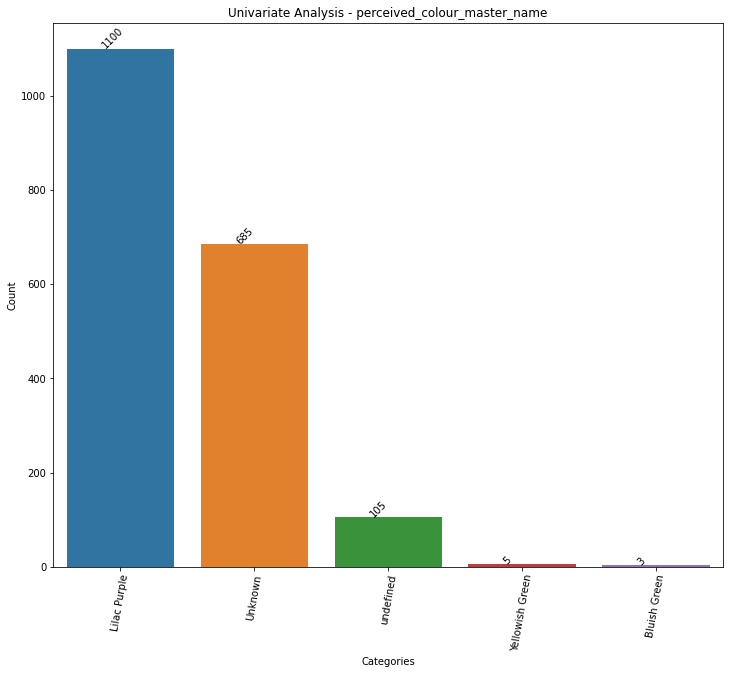

In [ ]:
univ_plot(col_name='perceived_colour_master_name',fig_size=(12,10),miss = 15)

perceived_colour_value_name

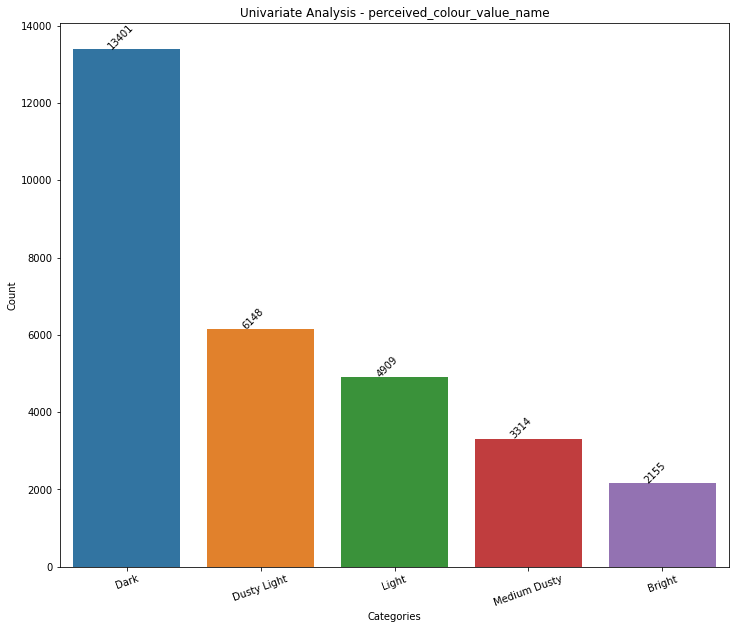

In [ ]:
univ_plot(col_name='perceived_colour_value_name',fig_size=(12,10), rot_tixks=20, top=5)

In [ ]:
df1.shape

(32035, 18)

colour_group_name

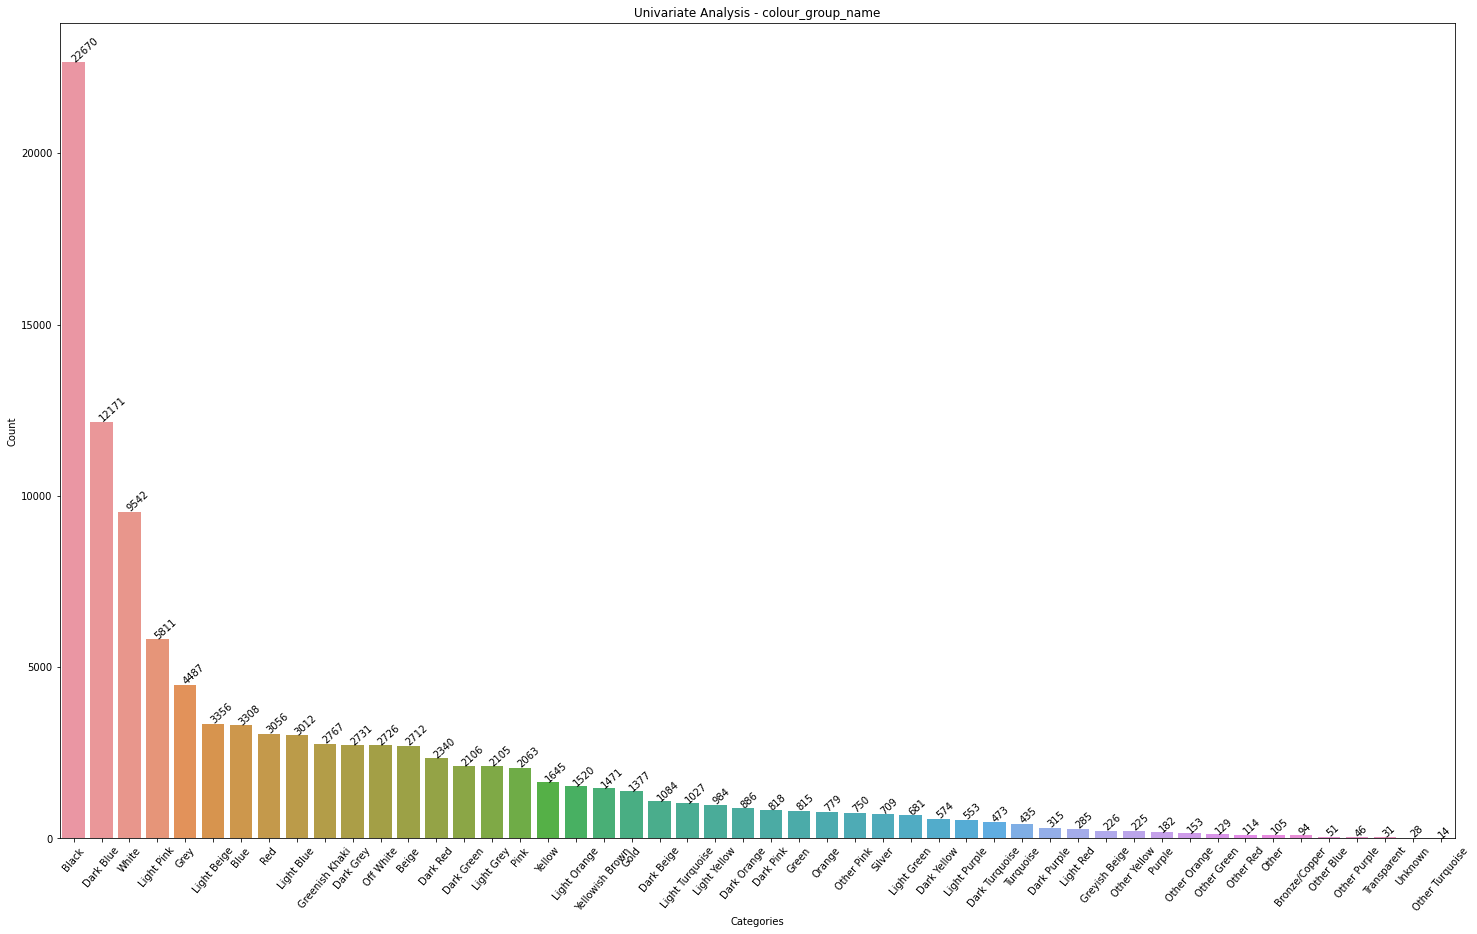

In [ ]:
univ_plot(col_name = 'colour_group_name',fig_size = (25,15),rot_tixks = 50,rot_labels = 42)

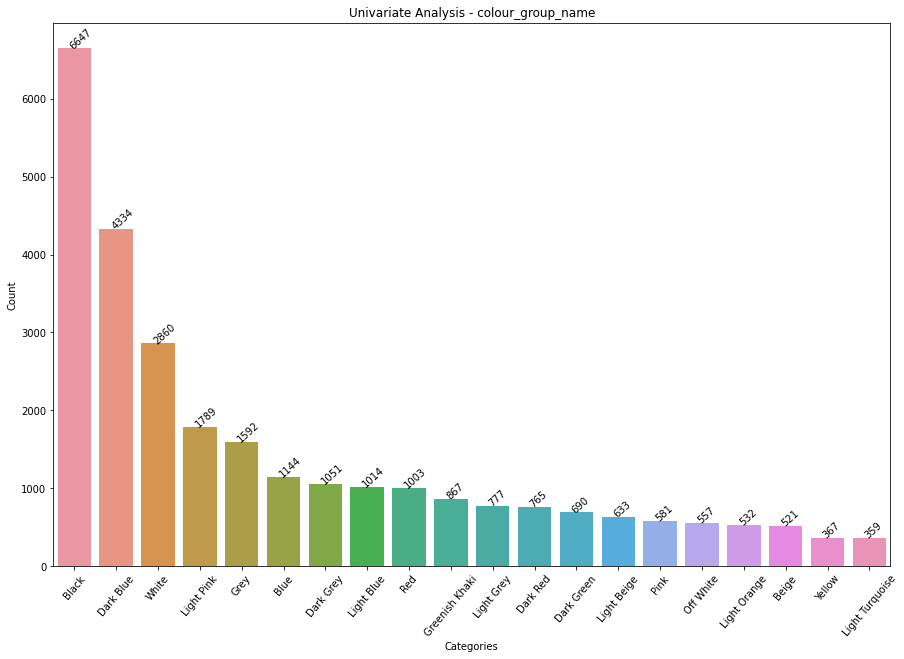

In [ ]:
univ_plot(col_name = 'colour_group_name',fig_size = (15,10),rot_tixks = 50,rot_labels = 42,top=20)

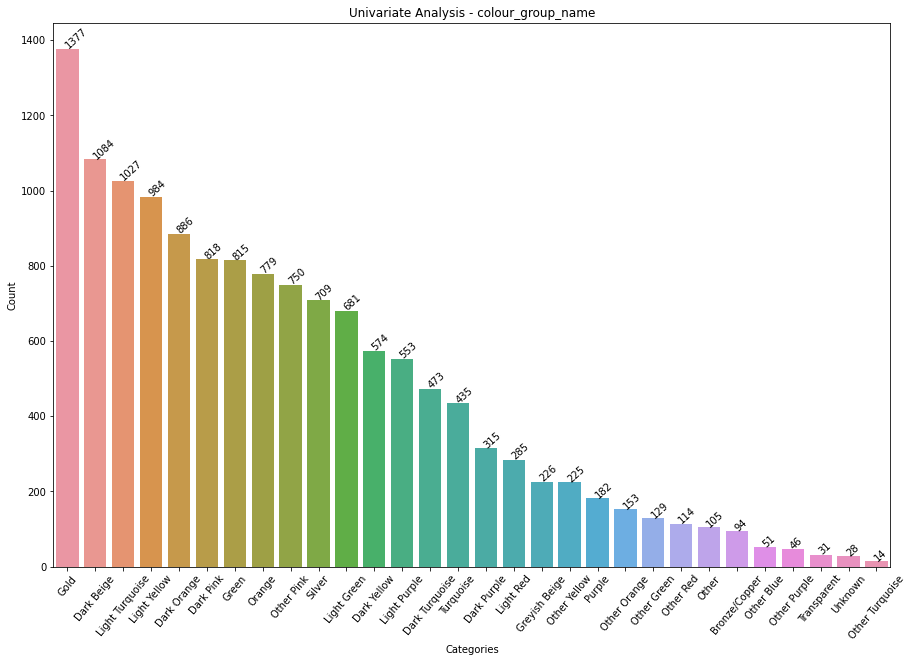

In [ ]:
univ_plot(col_name = 'colour_group_name',fig_size = (15,10),rot_tixks = 50,rot_labels = 42,miss=20)

graphical_appearance_name

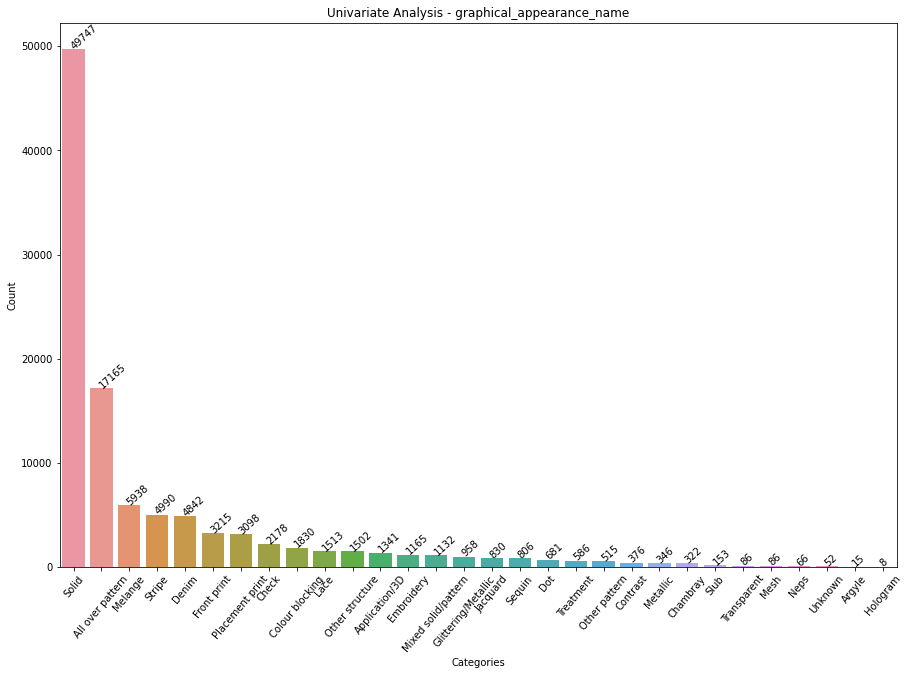

In [ ]:
univ_plot(col_name = 'graphical_appearance_name',fig_size = (15,10),rot_tixks = 50,rot_labels = 42)

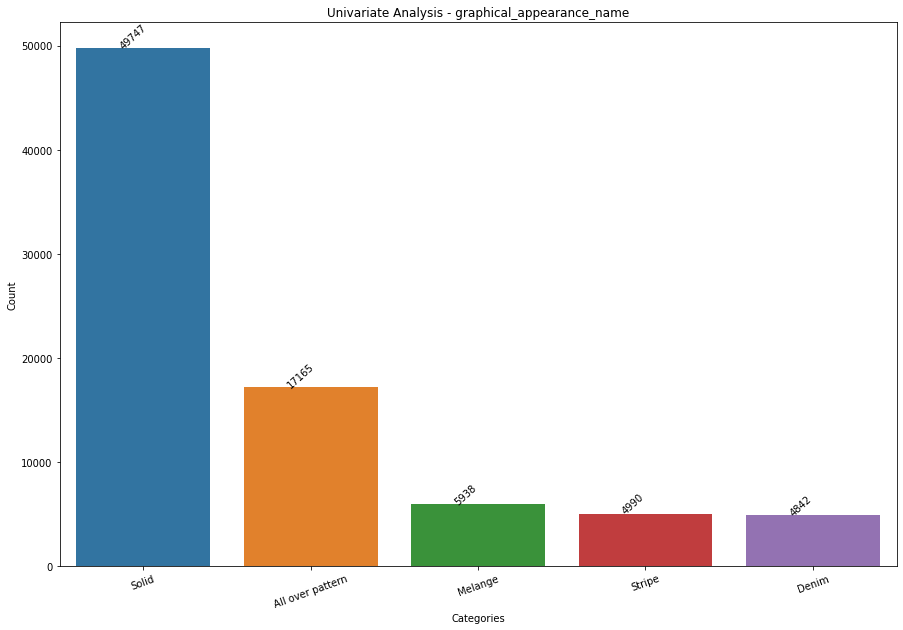

In [ ]:
univ_plot(col_name = 'graphical_appearance_name',fig_size = (15,10),rot_tixks = 20,rot_labels = 42,top=5)

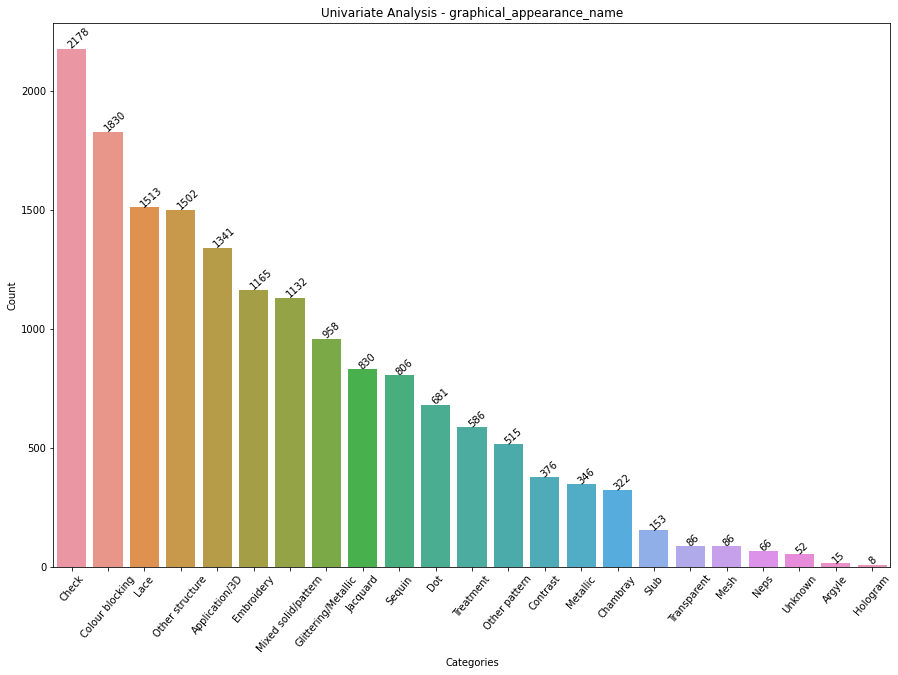

In [ ]:
univ_plot(col_name = 'graphical_appearance_name',fig_size = (15,10),rot_tixks = 50,rot_labels = 42,miss=7)

product_group_name

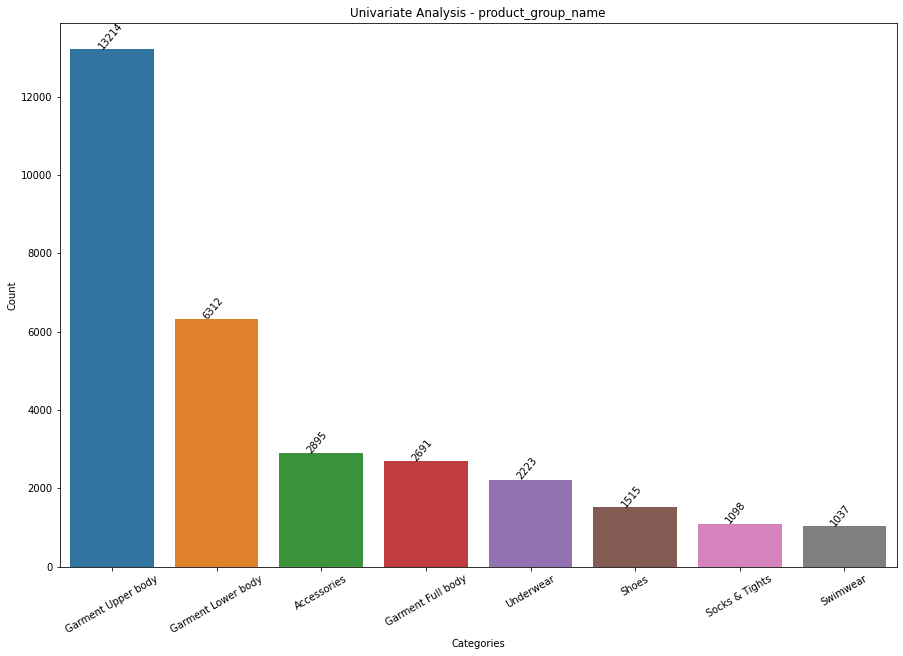

In [ ]:
univ_plot(col_name = 'product_group_name',fig_size = (15,10),rot_tixks = 30,rot_labels = 50, top = 8)

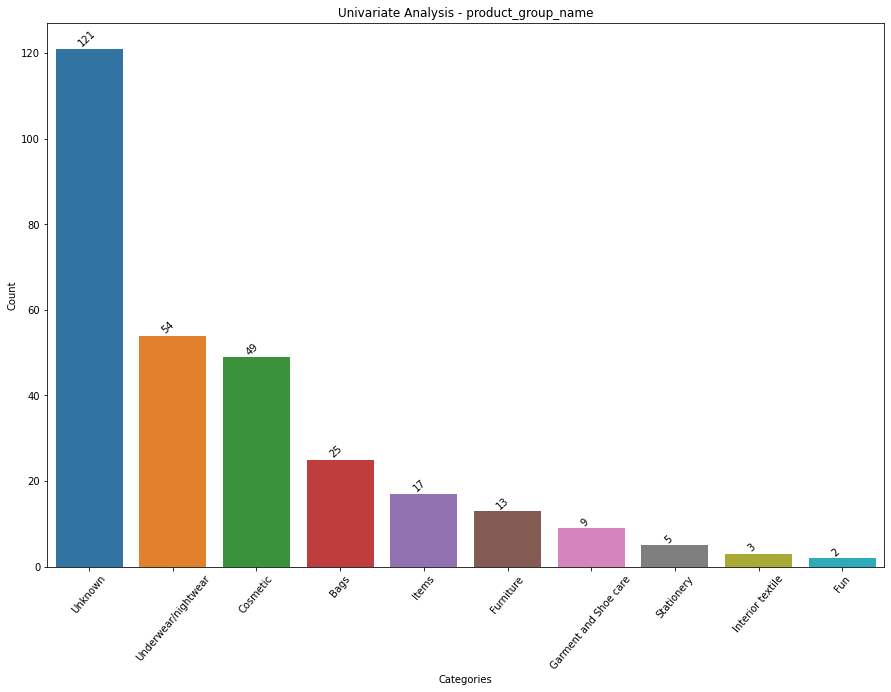

In [ ]:
univ_plot(col_name = 'product_group_name',fig_size = (15,10),rot_tixks = 50,rot_labels = 42,miss=9)

prod_name

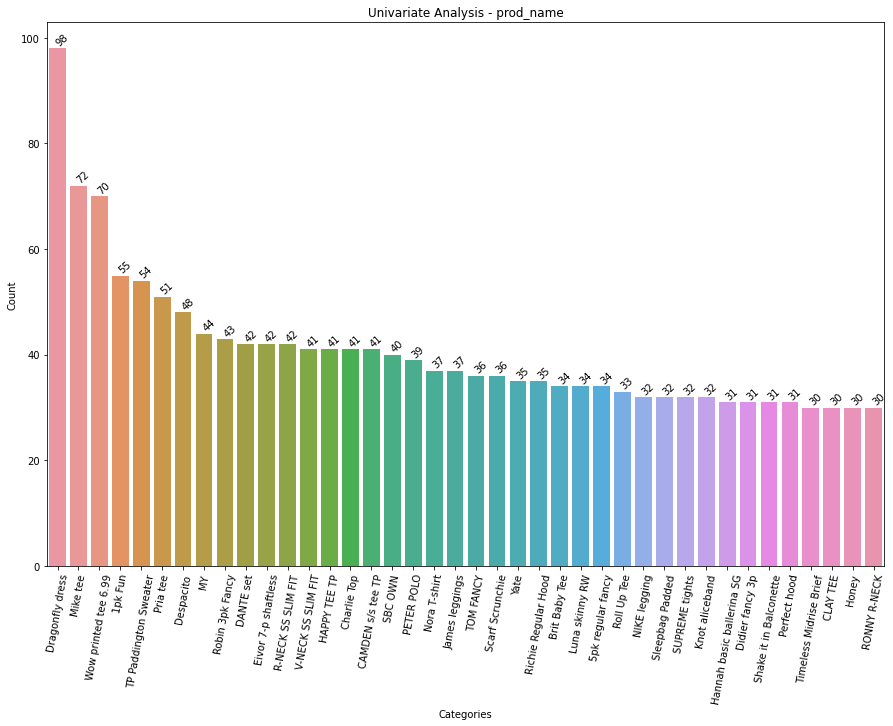

In [ ]:
univ_plot(col_name = 'prod_name',fig_size = (15,10),rot_tixks = 80,rot_labels = 42, top=40)

product_type_name

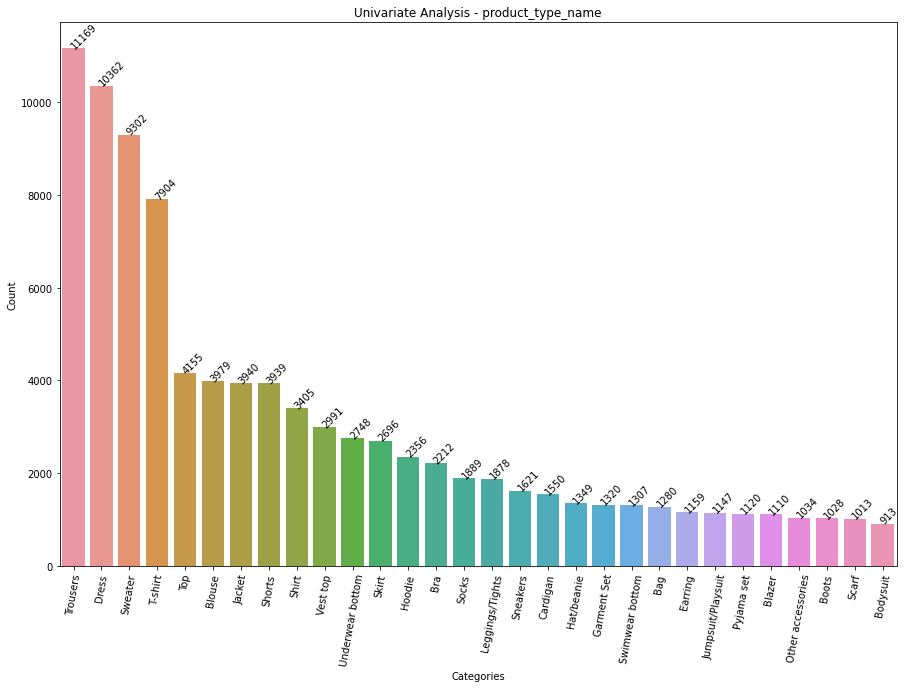

In [ ]:
univ_plot(col_name = 'product_type_name',fig_size = (15,10),top=30)

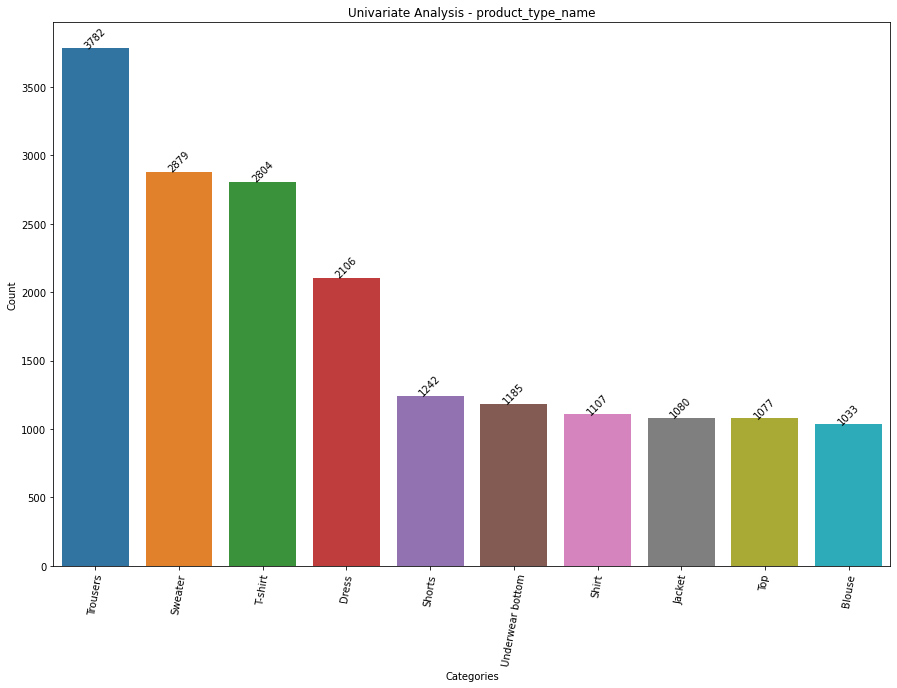

In [ ]:
univ_plot(col_name = 'product_type_name',fig_size = (15,10),top=10)

Ladieswear | Solid | Dark | Black

In [ ]:
df1.product_group_name.unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [ ]:
df1[(df1['index_group_name'] == 'Ladieswear')].shape

(39737, 18)

In [ ]:
df1[(df1['graphical_appearance_name'] == 'Solid')  & (df1['index_group_name'] == 'Ladieswear')].shape

(23426, 18)

In [ ]:
# How many solids among Ladieswear
(df1[(df1['graphical_appearance_name'] == 'Solid')  & (df1['index_group_name'] == 'Ladieswear')].shape[0]) /(df1[(df1['index_group_name'] == 'Ladieswear')].shape[0])

0.5895261343332411

In [ ]:
df1[(df1['perceived_colour_value_name'] == 'Dark') & (df1['graphical_appearance_name'] == 'Solid')  & (df1['index_group_name'] == 'Ladieswear')].shape

(10436, 18)

In [ ]:
df1[(df1['product_group_name'] == 'Garment Lower body') & (df1['index_group_name'] == 'Ladieswear')].shape

(5742, 18)

In [ ]:
# How many Lower body and Ladies
(df1[(df1['product_group_name'] == 'Garment Lower body') & (df1['index_group_name'] == 'Ladieswear')].shape[0])/(df1[(df1['index_group_name'] == 'Ladieswear')].shape[0])

0.1445000880791202

In [ ]:
# How many Upper body and Ladies
(df1[(df1['product_group_name'] == 'Garment Upper body') & (df1['index_group_name'] == 'Ladieswear')].shape[0])/(df1[(df1['index_group_name'] == 'Ladieswear')].shape[0])

0.3550846817827214

## Bivariate analysis

In [ ]:
df.index_group_name.unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [ ]:
df.index_name.unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [ ]:
df1.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_name           30
colour_group_name                   50
perceived_colour_value_name          8
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_name                          10
index_group_name                     5
section_no                          57
section_name                        56
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [ ]:
df.index_group_name.unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

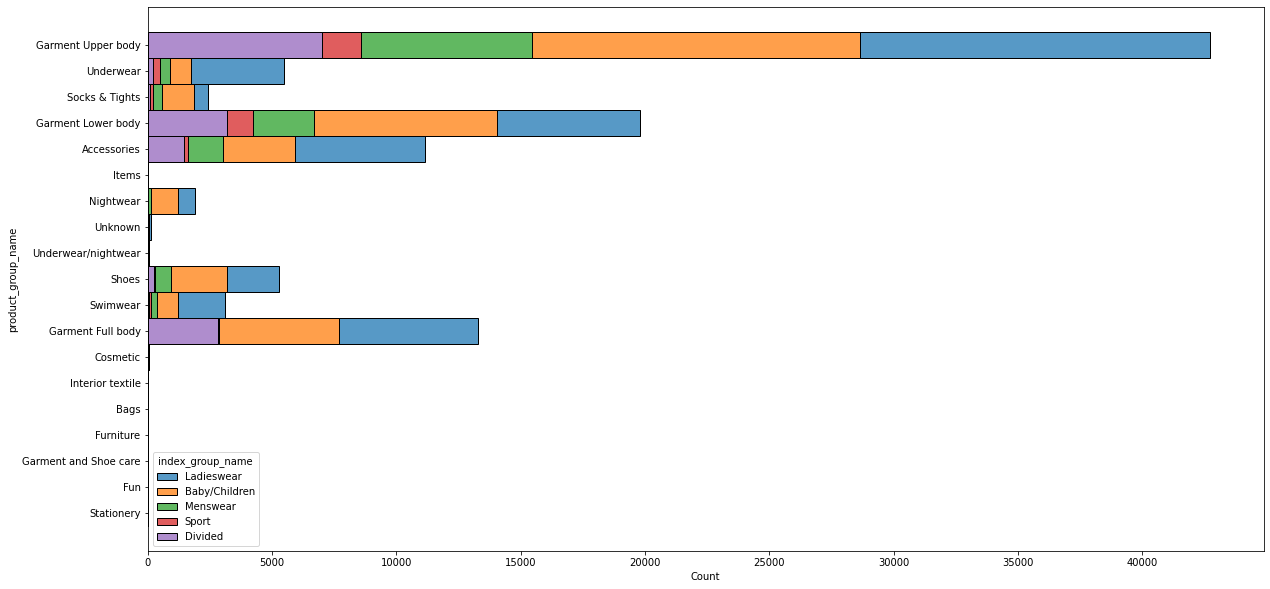

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df1, y='product_group_name', hue='index_group_name', multiple="stack")
plt.show()

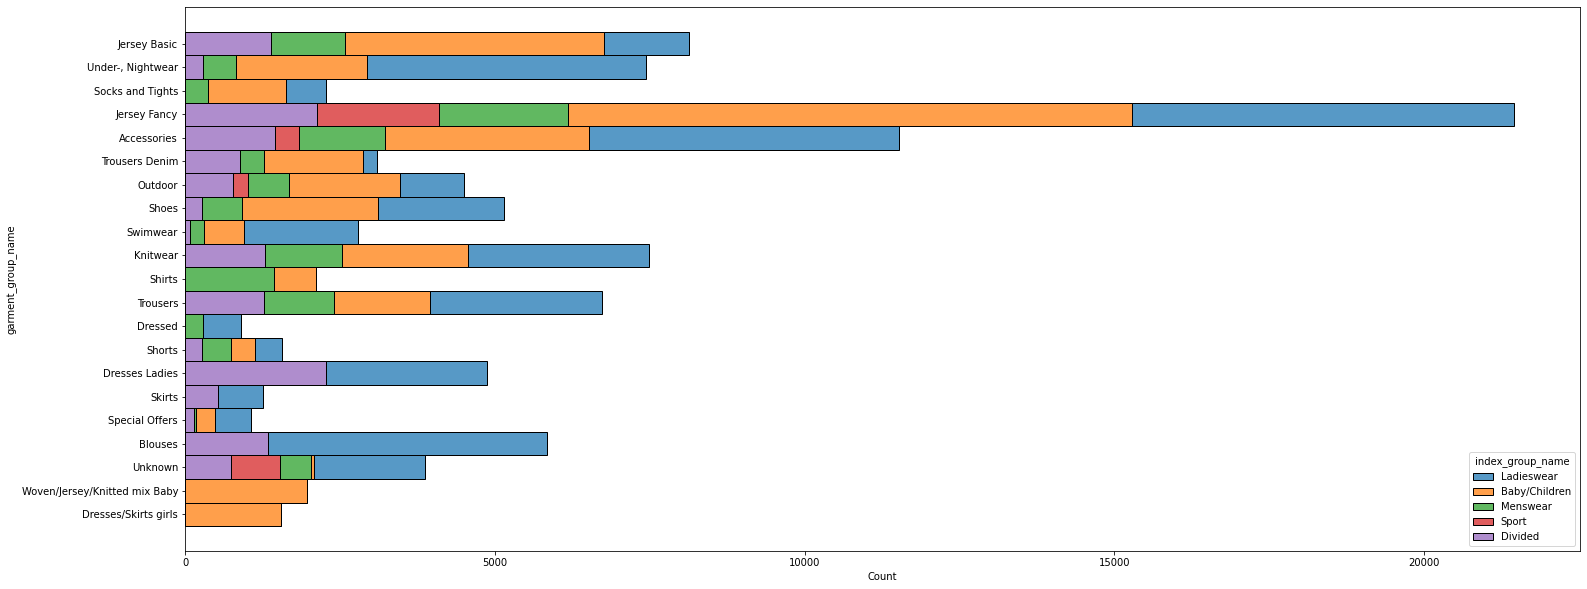

In [ ]:
plt.figure(figsize=(25, 10))
ax = sns.histplot(data=df1, y='garment_group_name', hue='index_group_name', multiple="stack")
plt.show()

In [ ]:
aa = df1.groupby(['garment_group_name', 'index_group_name']).count()
aa.to_csv('grouped.csv')

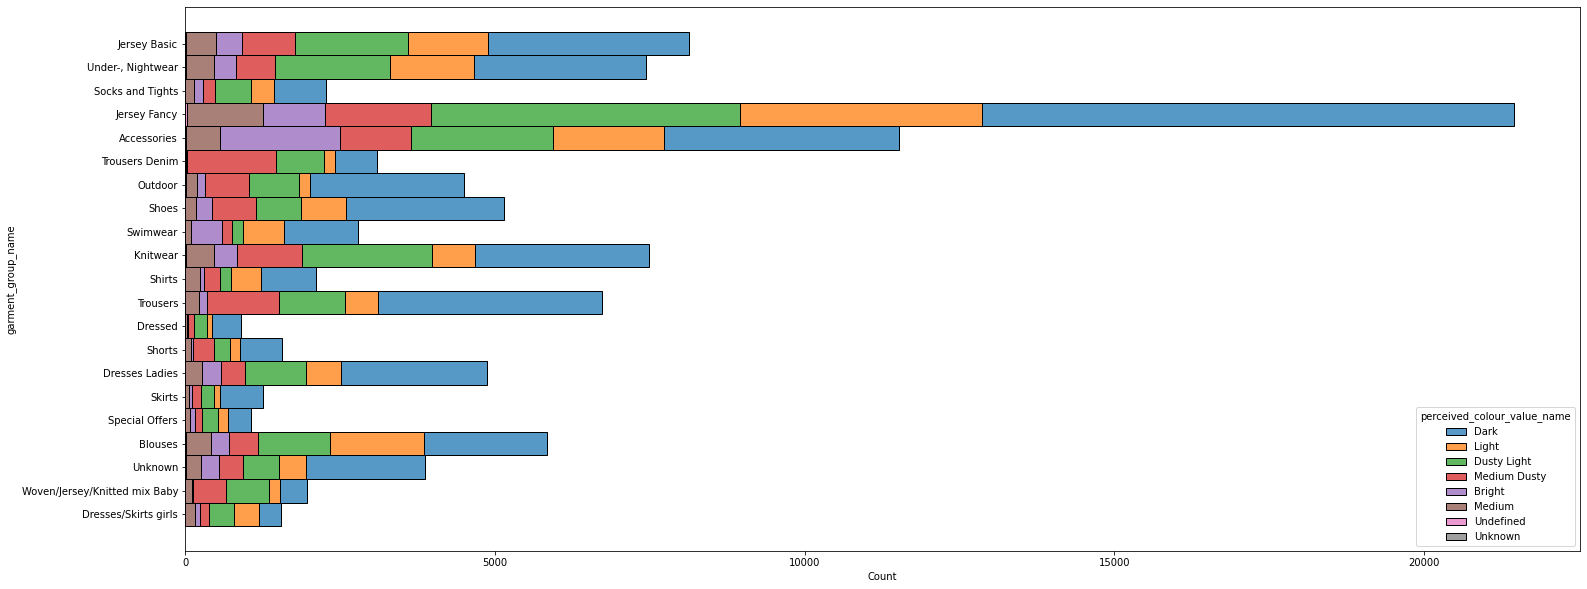

In [ ]:
plt.figure(figsize=(25, 10))
ax = sns.histplot(data=df1, y='garment_group_name', hue='perceived_colour_value_name', multiple="stack")
plt.show()

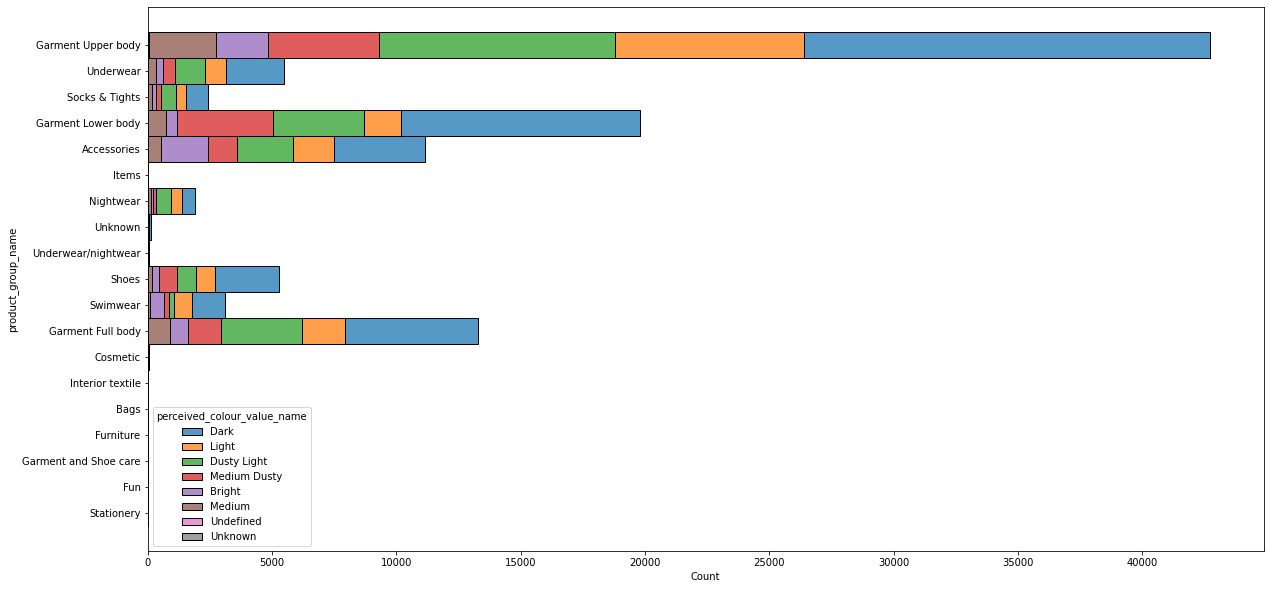

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df1, y='product_group_name', hue='perceived_colour_value_name', multiple="stack")
plt.show()

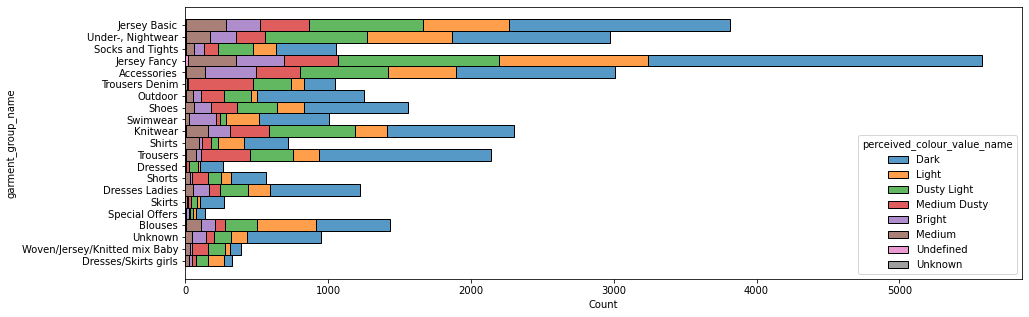

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df1, y='garment_group_name', hue='perceived_colour_value_name', multiple="stack")
plt.show()

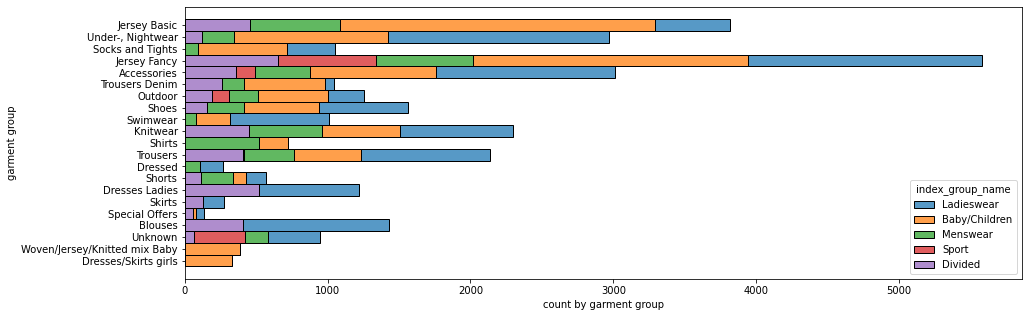

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data = df1, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
plt.xlabel('count by garment group')
plt.ylabel('garment group')
plt.show()

## Word Clouds

In [ ]:
# df = pd.read_csv('articles.csv')
df = df.dropna()

In [ ]:
# Tokenization
import re
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

# Remove Stop words
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

# Stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# all lowercase
df['detail_desc']=df['detail_desc'].str.lower()

df['detail_desc']= df['detail_desc'].apply(lambda x: tokenization(x))
df['detail_desc']=df['detail_desc'].apply(lambda x: stemming(x))
df['detail_desc']= df['detail_desc'].apply(lambda x:remove_stopwords(x))
df['detail_desc']=df['detail_desc'].apply(lambda x:lemmatizer(x))

<ipython-input-17-4efae2439f01>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detail_desc']=df['detail_desc'].str.lower()
<ipython-input-17-4efae2439f01>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detail_desc']= df['detail_desc'].apply(lambda x: tokenization(x))
<ipython-input-17-4efae2439f01>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
# all daata into one
corpus = nltk.flatten(df['detail_desc'].to_list())

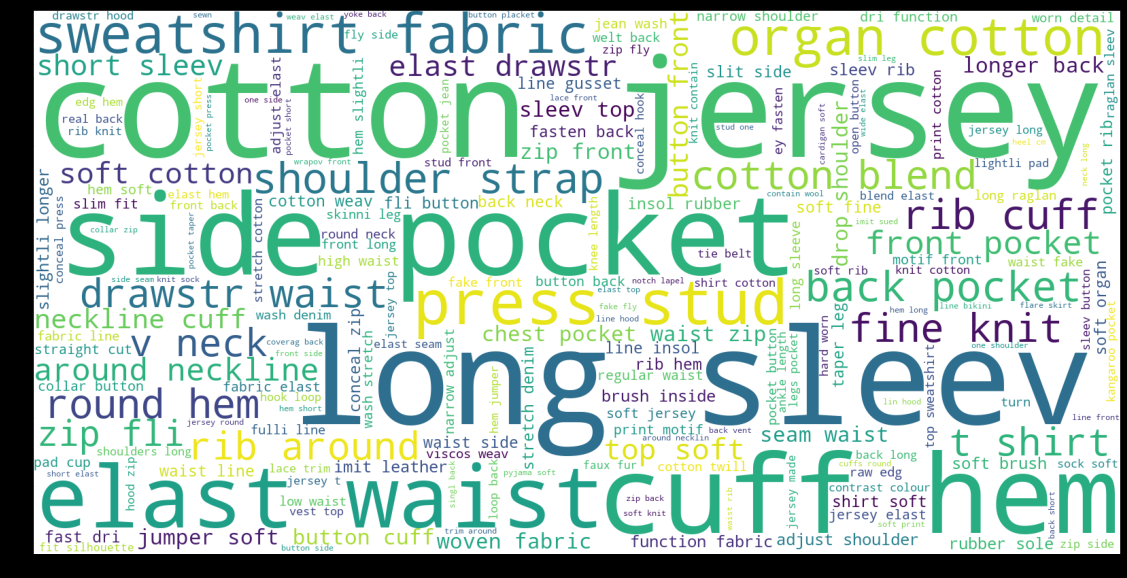

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(corpus))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [ ]:
# Word count
pd.value_counts(np.array(corpus))[:10]

cotton    10082
elast      8284
top        7494
soft       7135
jersey     6902
rib        6557
hem.       6231
pocket     6039
zip        5564
short      5486
dtype: int64

References:  
Official Documentation of libraries  
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/ 